In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [22]:
print(df.head(9))

   AnimalName  symptoms1  symptoms2  symptoms3  symptoms4  symptoms5  \
0           6         63         31        179        182         32   
1           6         63         31         31        165        113   
2           6         63         31         31        173          8   
3           6         63         34         31         87        142   
4           6         63         31         31         87         21   
5           6         63        131        137         72        149   
6           6        189         31        115        161         48   
7           6         58         13         66        169         89   
8           6         63         34        172        182         49   

   Dangerous  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1  
8          1  


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AnimalName  843 non-null    int32
 1   symptoms1   843 non-null    int32
 2   symptoms2   843 non-null    int32
 3   symptoms3   843 non-null    int32
 4   symptoms4   843 non-null    int32
 5   symptoms5   843 non-null    int32
 6   Dangerous   843 non-null    int32
dtypes: int32(7)
memory usage: 29.6 KB
None


In [24]:
# periksa nilai yang hilang di setiap kolom
print(df.isnull().sum())

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     0
dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [26]:
print("Tipe data setelah encoding:")
print(df.dtypes)

Tipe data setelah encoding:
AnimalName    int32
symptoms1     int32
symptoms2     int32
symptoms3     int32
symptoms4     int32
symptoms5     int32
Dangerous     int32
dtype: object


In [27]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,6,63,31,179,182,32,1
1,6,63,31,31,165,113,1
2,6,63,31,31,173,8,1
3,6,63,34,31,87,142,1
4,6,63,31,31,87,21,1


In [28]:
df[(df['Dangerous'] != 'Yes') & (df['Dangerous'] != 'No')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,6,63,31,179,182,32,1
1,6,63,31,31,165,113,1
2,6,63,31,31,173,8,1
3,6,63,34,31,87,142,1
4,6,63,31,31,87,21,1
...,...,...,...,...,...,...,...
866,2,63,34,115,53,160,1
867,2,63,95,88,87,78,1
868,2,97,90,179,107,82,1
869,2,77,26,179,27,159,1


In [29]:
df.dropna(inplace=True)

In [31]:
df.AnimalName.value_counts()

AnimalName
2     129
29    110
25     63
12     62
10     59
9      56
0      37
36     36
6      34
8      33
21     28
15     26
5      26
3      21
17     18
20     16
27     11
18     10
4       9
13      7
24      6
31      6
42      5
32      4
38      4
39      3
26      3
40      2
16      2
34      1
19      1
35      1
7       1
14      1
22      1
28      1
45      1
1       1
23      1
33      1
11      1
44      1
43      1
37      1
41      1
30      1
Name: count, dtype: int64

In [32]:
for col in df.columns: 
    print(f'Type of {col} column is {df[col].dtype}')

Type of AnimalName column is int32
Type of symptoms1 column is int32
Type of symptoms2 column is int32
Type of symptoms3 column is int32
Type of symptoms4 column is int32
Type of symptoms5 column is int32
Type of Dangerous column is int32


<Axes: xlabel='AnimalName', ylabel='count'>

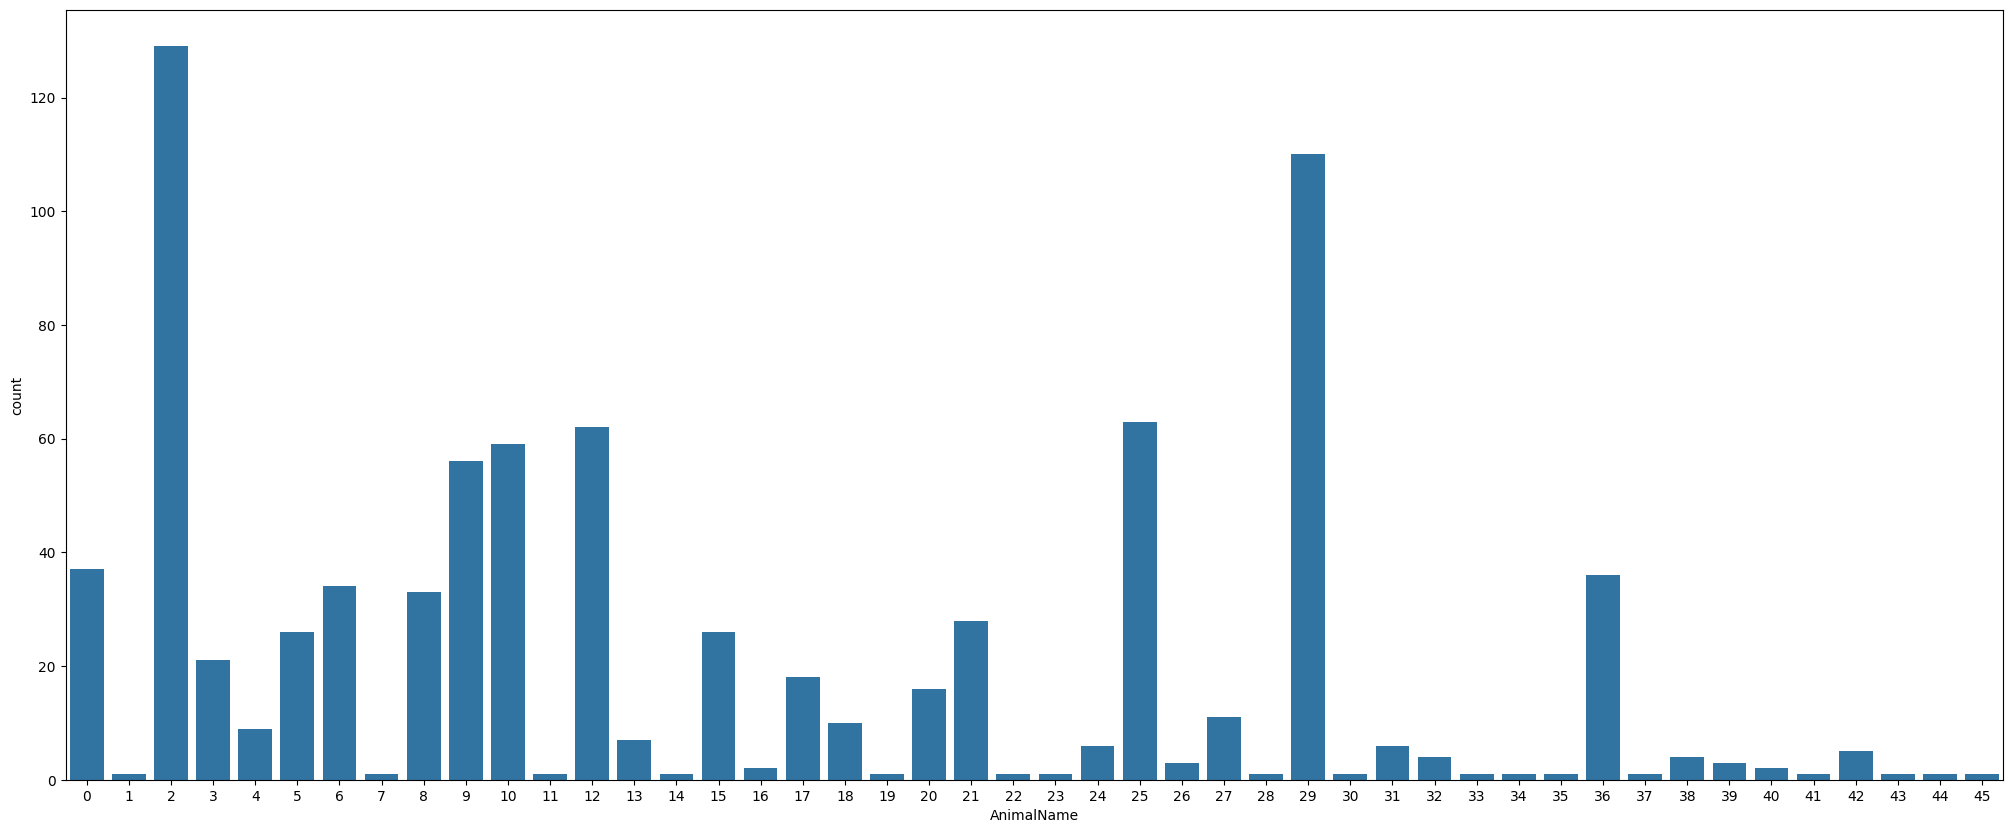

In [33]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x=df.AnimalName)  

In [41]:
# Memilih fitur dan label
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

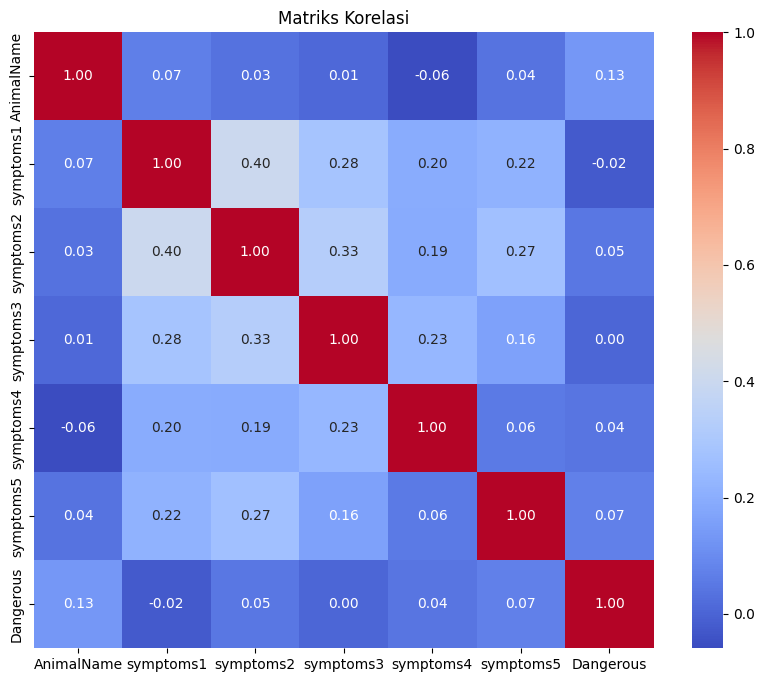

In [42]:
import seaborn as sns

numerical_data = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


In [43]:
# Membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Memeriksa bentuk dan tipe data setelah pembagian
print("\nBentuk X_train:", X_train.shape)
print("Tipe data X_train:", X_train.dtype)


Bentuk X_train: (674, 2)
Tipe data X_train: int32


In [46]:
# Menampilkan hasil pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (674, 2)
Ukuran X_test: (169, 2)
Ukuran y_train: (674,)
Ukuran y_test: (169,)


In [47]:
# Menampilkan nilai X_train dan y_train
print("\nFitur Pelatihan (X_train):")
print(X_train)
print("\nTarget Pelatihan (y_train):")
print(y_train)


Fitur Pelatihan (X_train):
[[ 62  89]
 [202 200]
 [  2  86]
 ...
 [ 30  93]
 [115 103]
 [108 213]]

Target Pelatihan (y_train):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1

In [48]:
# Menampilkan nilai X_test dan y_test
print("\nFitur Pengujian (X_test):")
print(X_test)
print("\nTarget Pengujian (y_test):")
print(y_test)


Fitur Pengujian (X_test):
[[167  89]
 [ 47  31]
 [ 68  31]
 [185  89]
 [ 31 179]
 [ 35 179]
 [215 214]
 [ 97 179]
 [ 18 179]
 [ 31  31]
 [204  22]
 [ 31   6]
 [ 95 115]
 [200 215]
 [ 30 213]
 [ 97  52]
 [ 94 202]
 [143 177]
 [ 31  56]
 [ 49  40]
 [ 76 120]
 [ 15  89]
 [167  89]
 [207 216]
 [ 68  31]
 [ 96  16]
 [151  31]
 [101  42]
 [224 211]
 [184  39]
 [131  97]
 [ 31  37]
 [ 31 185]
 [ 16  94]
 [179 133]
 [149  10]
 [129 187]
 [ 31 179]
 [223 193]
 [125 173]
 [141  55]
 [229 212]
 [207 207]
 [ 25 134]
 [207 199]
 [ 31  38]
 [ 30 147]
 [ 43 174]
 [ 84 148]
 [ 26 179]
 [ 31  31]
 [162   1]
 [ 44  76]
 [228 213]
 [ 78 148]
 [226 192]
 [229 212]
 [207 207]
 [ 54 185]
 [178  12]
 [ 75 180]
 [200 215]
 [ 66  32]
 [ 72 179]
 [191 137]
 [ 31 179]
 [164  74]
 [ 31  37]
 [128   4]
 [ 95  88]
 [ 35  31]
 [223 193]
 [ 87 181]
 [202 200]
 [ 61 151]
 [ 31  31]
 [163 150]
 [ 31 213]
 [ 35 131]
 [163 150]
 [ 35  31]
 [ 34 115]
 [192 161]
 [120  31]
 [ 31  35]
 [113  89]
 [  7  21]
 [179  38]
 [168

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
# Menghitung dan menampilkan confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  
print("\nConfusion Matrix:")
print(cm)                                
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model Naive Bayes: {accuracy * 100:.2f}%')


Confusion Matrix:
[[  0   3   0]
 [  0 165   0]
 [  0   0   1]]
Akurasi Model Naive Bayes: 98.22%


C:\Users\RYAN AKBAR\AppData\Local\Temp\ipykernel_13424\637568913.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


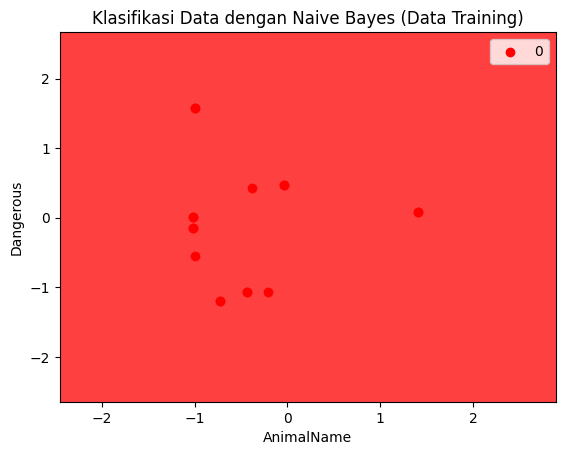

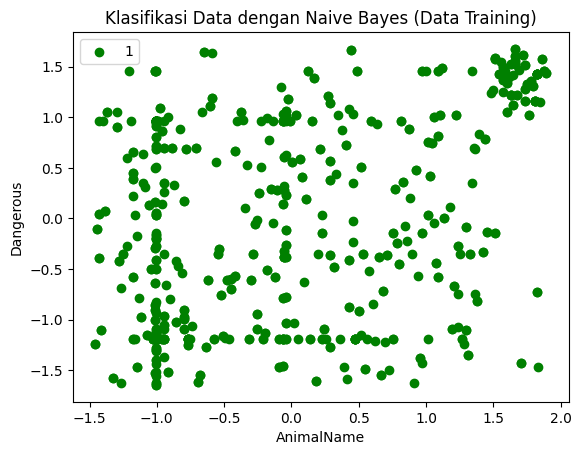

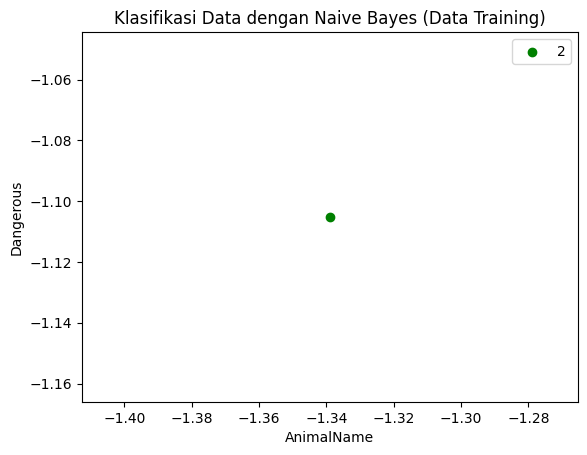

In [54]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('AnimalName')
    plt.ylabel('Dangerous')
    plt.legend()
    plt.show()

C:\Users\RYAN AKBAR\AppData\Local\Temp\ipykernel_13424\3755988236.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


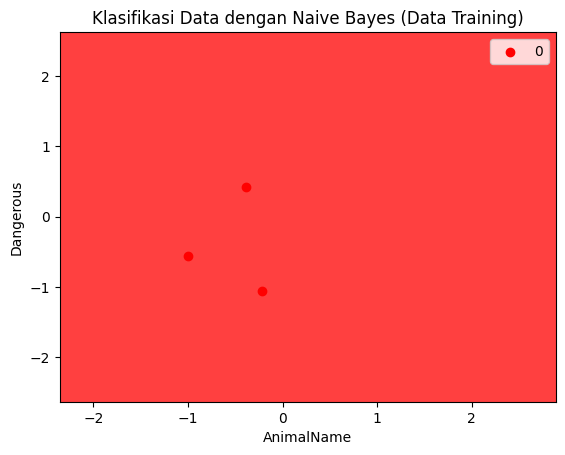

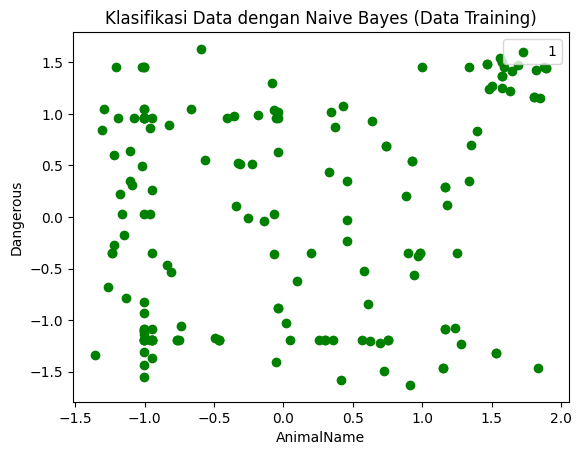

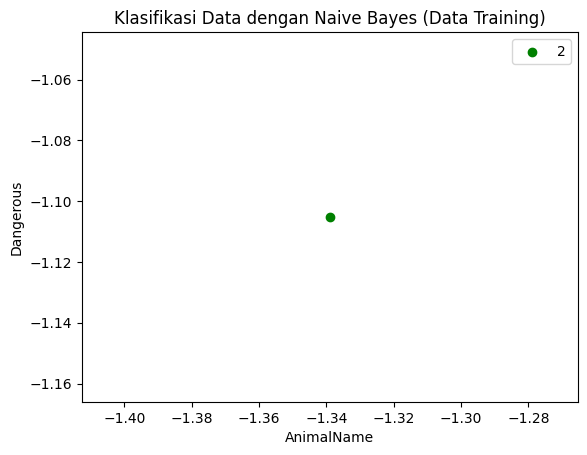

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('AnimalName')
    plt.ylabel('Dangerous')
    plt.legend()
    plt.show()